## 1.Why Regularization & Generalization?

Key idea

Generalization = how well a model performs on unseen data

A model may:

Underfit → too simple → poor train & test accuracy

Overfit → too complex → excellent train accuracy, poor test accuracy

🎯 Goal of Regularization

Regularization techniques limit model complexity so that the model:

Learns meaningful patterns

Ignores noise

Performs well on new data



## 2.Setup & Dataset

We will:

Use a synthetic classification dataset

Train multiple models

Compare no regularization vs L1 vs L2 vs Dropout

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2

In [21]:
# Create a dataset that can overfit easily
X, y = make_classification(
    n_samples=2000,
    n_features=20,
    n_informative=5,
    n_redundant=5,
    flip_y=0.3,
    random_state=42
)

In [22]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [23]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## 3.Baseline Model (No Regularization)

 Why start here?

This model will likely overfit, helping us see the problem clearly.

In [24]:
def build_baseline():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [25]:
baseline_model = build_baseline()

history_base = baseline_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=0
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Plot Learning Curves

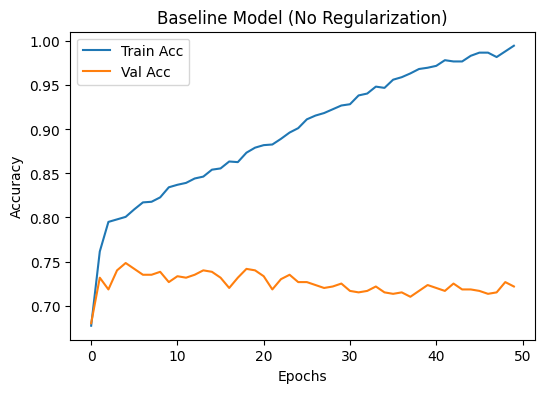

In [26]:
def plot_history(history, title):
    plt.figure(figsize=(6,4))
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

plot_history(history_base, "Baseline Model (No Regularization)")


Interpretation

Large gap between train & val → Overfitting

Model memorizes training data

## 4.L2 Regularization (Weight Decay)

📌 Concept

L2 penalty adds this to the loss:

$$ λ∑w^2 $$

This:

Penalizes large weights

Encourages smoother decision boundaries

Model with L2

In [27]:
def build_l2():
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l2(0.001),
              input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


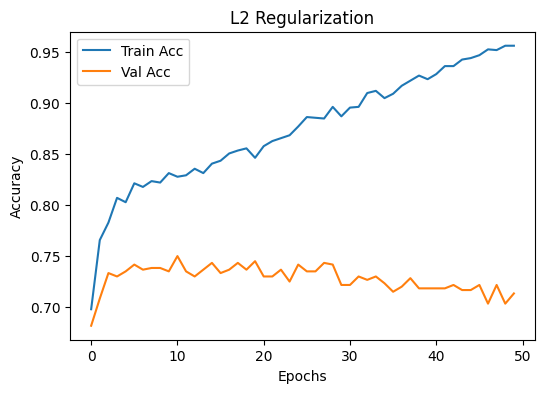

In [28]:
l2_model = build_l2()

history_l2 = l2_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=0
)

plot_history(history_l2, "L2 Regularization")


What changed?

Smaller gap between train & validation

Better generalization

Slightly lower training accuracy (expected!)

## 5.L1 Regularization (Feature Selection Effect)

📌 Concept

L1 penalty:

$$  λ∑ | w | $$

Effects:

Pushes many weights exactly to zero

Acts like feature selection

Model with L1

In [29]:
def build_l1():
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l1(0.001),
              input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu', kernel_regularizer=l1(0.001)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


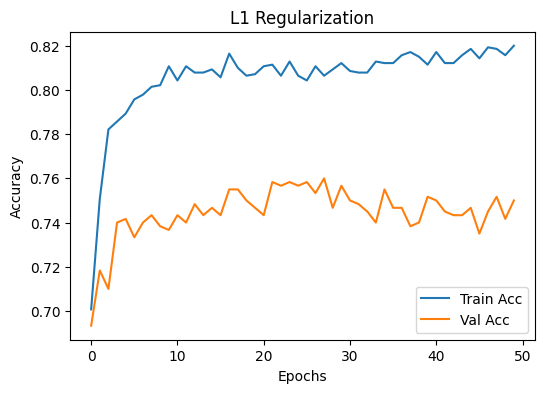

In [30]:
l1_model = build_l1()

history_l1 = l1_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=0
)

plot_history(history_l1, "L1 Regularization")


Interpretation

Stronger regularization than L2

Can underfit if λ is too large

Useful when many features are irrelevant

## 6.Dropout (Deep Learning Regularization)

📌 Concept

Dropout:

Randomly disables neurons during training

Prevents co-adaptation

Forces redundancy & robustness

Model with Dropout

In [31]:
def build_dropout():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


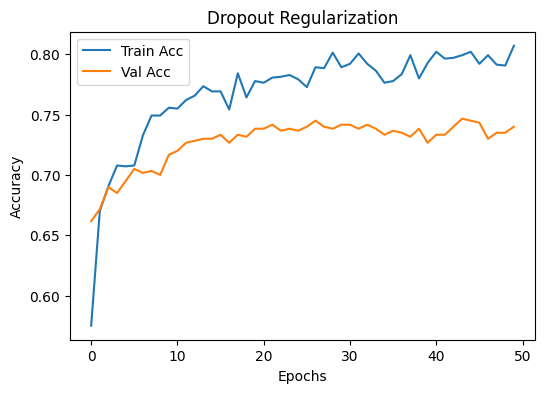

In [32]:
drop_model = build_dropout()

history_drop = drop_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=0
)

plot_history(history_drop, "Dropout Regularization")


Key Observation

Training accuracy drops

Validation accuracy improves

Smaller gap → better generalization

## 7.How to Read Learning Curves (IMPORTANT)

```text
📉 Case 1: Underfitting

Low train accuracy

Low validation accuracy

Fix: ↑ model capacity, ↓ regularization
```
```text
📈 Case 2: Overfitting

High train accuracy

Low validation accuracy

Fix: Regularization, dropout, more data
```
```text
✅ Case 3: Good Fit

Train & validation curves close

Both reasonably high
```